In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Step 1: Create the database and insert sample data
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [ ]:
# Drop table if exists (for re-run safety)
cursor.execute("DROP TABLE IF EXISTS sales")


In [4]:
# Create sales table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
);
""")

In [5]:
# Insert some sample sales data
sample_data = [
    ("Apple", 10, 1.5),
    ("Banana", 5, 0.8),
    ("Orange", 8, 1.2),
    ("Apple", 7, 1.5),
    ("Banana", 12, 0.8),
    ("Orange", 3, 1.2),
]

In [6]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [10]:
# Step 2: Run SQL query to get summary
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

df = pd.read_sql_query(query, conn)


In [9]:
# Step 3: Display results
print("Sales Summary:\n")
print(df)


Sales Summary:

  product  total_qty  revenue
0   Apple         17     25.5
1  Banana         17     13.6
2  Orange         11     13.2


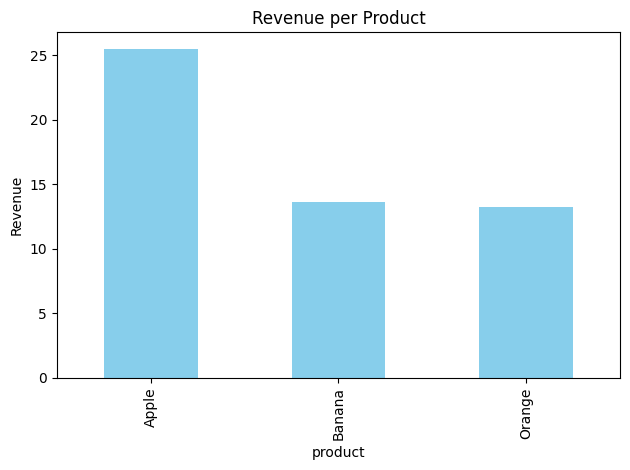

In [11]:
# Step 4: Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.ylabel("Revenue")
plt.title("Revenue per Product")
plt.tight_layout()
plt.show()

In [12]:
# Close the connection
conn.close()